## Metric Learning

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import time
import os

os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

data_path = "./"  # 任意の場所
train_dataset = datasets.FashionMNIST(data_path, train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(data_path, train=False, transform=transform)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.25)
        self.fc = nn.Linear(18432, 1152)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        x = F.relu(x)
        x = self.dropout2(x)
        return x

class Embedder(nn.Module):
    def __init__(self):
        super(Embedder, self).__init__()
        self.fc = nn.Linear(1152, 128)
     
    def forward(self, x):
        x = self.fc(x)
        return x

In [4]:
from pytorch_metric_learning import losses, miners, distances, reducers, samplers

distance = distances.CosineSimilarity()
reducer = reducers.ThresholdReducer(low=0)
loss = losses.TripletMarginLoss(margin=0.2, distance=distance, reducer=reducer)
miner = miners.TripletMarginMiner(margin=0.2, distance=distance, type_of_triplets="semihard")
sampler = samplers.MPerClassSampler(train_dataset.targets, m=4,
                                    length_before_new_iter=len(train_dataset))

loss_funcs = {"metric_loss": loss}
mining_funcs = {"tuple_miner": miner}

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.63it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


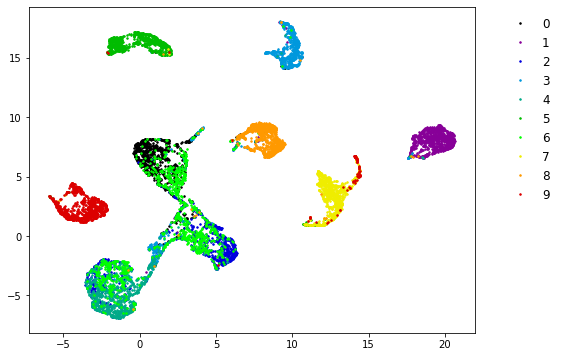

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.50it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


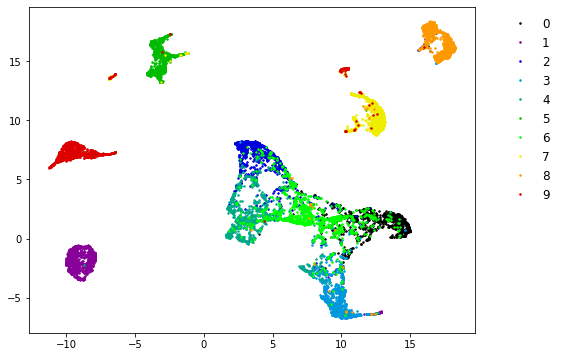

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.55it/s]


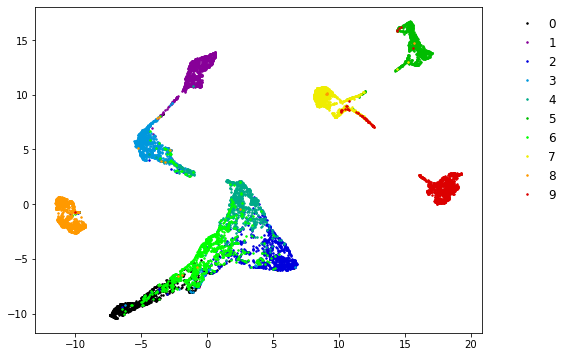

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.53it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


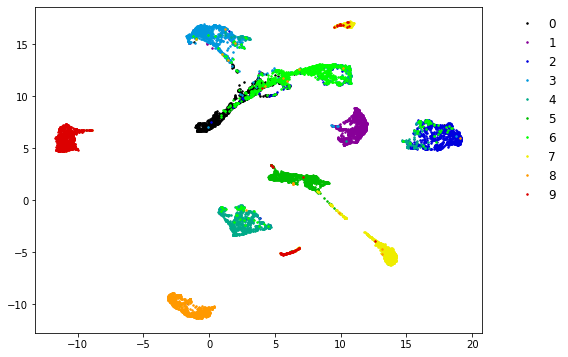

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.28it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


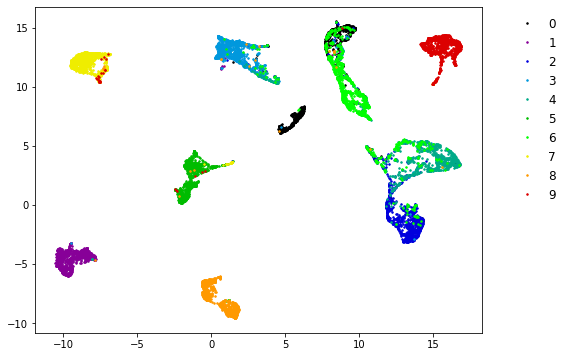

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.33it/s]


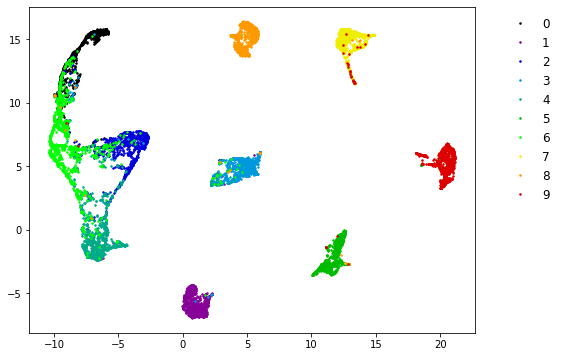

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.55it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


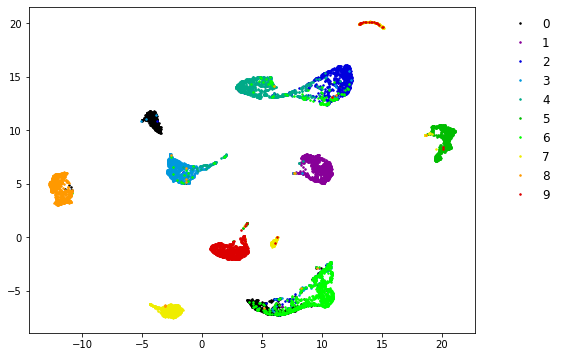

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.35it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


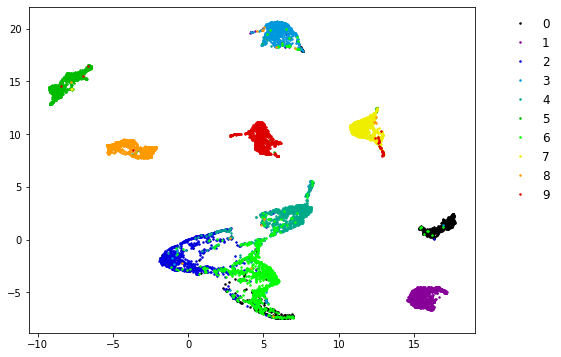

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.46it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


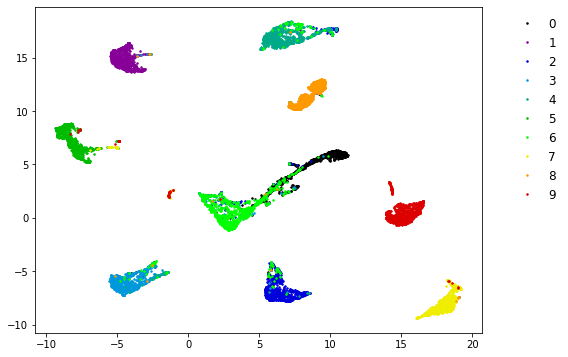

  0%|          | 0/234 [00:00<?, ?it/s]/home/yanai-lab/higuchi-k/.local/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 313/313 [00:05<00:00, 59.20it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/umap/spectral.py:341: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


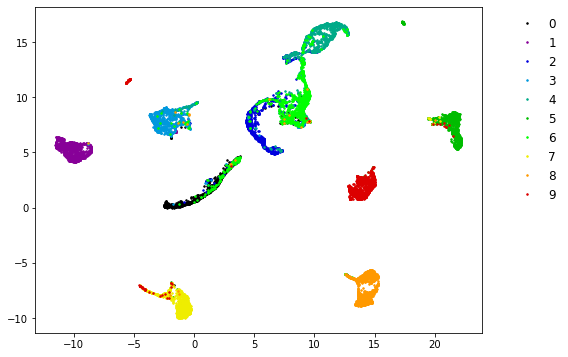

In [6]:
import faiss
import numba
import logging
import numpy as np

import umap
from cycler import cycler
from torch import optim
from pytorch_metric_learning import trainers, testers
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.utils import logging_presets


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# モデルをロード
trunk = Net()
trunk = torch.nn.DataParallel(trunk.to(device))
embedder = Embedder()
embedder = torch.nn.DataParallel(embedder.to(device))
models = {"trunk": trunk, "embedder": embedder}

# Optimizerの設定
trunk_optimizer = optim.Adam(trunk.parameters(), lr=0.005)
embedder_optimizer = optim.Adam(embedder.parameters(), lr=0.001)
optimizers = {"trunk_optimizer": trunk_optimizer,
              "embedder_optimizer": embedder_optimizer}

# 可視化用のvisual_hookの実装
record_keeper, _, _ = logging_presets.get_record_keeper("logs", "tensorboard")
hooks = logging_presets.get_hook_container(record_keeper)

def visualizer_hook(umapper, umap_embeddings, labels, split_name, keyname, epoch):
    class_labels = np.unique(labels)
    num_classes = len(class_labels)
    
    fig = plt.figure(figsize=(8, 6))
    colors = [plt.cm.nipy_spectral(i) for i in np.linspace(0, 0.9, num_classes)]
    plt.gca().set_prop_cycle(cycler("color", colors))

    for i, lab in enumerate(class_labels):
        idx = labels == class_labels[i]
        plt.plot(umap_embeddings[idx, 0], umap_embeddings[idx, 1], ".", markersize=3, label=lab) 

    plt.legend(frameon=False, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    os.makedirs("result", exist_ok=True)
    plt.savefig(f"result/{epoch:02d}.png")
    plt.show()
    plt.close()

# Testerの設定
tester = testers.GlobalEmbeddingSpaceTester(end_of_testing_hook=hooks.end_of_testing_hook, 
                                            visualizer=umap.UMAP(), 
                                            visualizer_hook=visualizer_hook,
                                            dataloader_num_workers=4)

# Hookの設定
dataset_dict = {"val": test_dataset}
model_dir = "saved_models"
end_of_epoch_hook = hooks.end_of_epoch_hook(tester, 
                                            dataset_dict, 
                                            model_dir, 
                                            test_interval=1,
                                            patience=1)

# モデル訓練
num_epochs = 10
batch_size = 256

trainer = trainers.MetricLossOnly(models,
                                  optimizers,
                                  batch_size,
                                  loss_funcs,
                                  mining_funcs,
                                  train_dataset,
                                  sampler=sampler,
                                  dataloader_num_workers=4,
                                  end_of_iteration_hook=hooks.end_of_iteration_hook,
                                  end_of_epoch_hook=end_of_epoch_hook)
trainer.train(num_epochs=num_epochs)

In [7]:
print(numba.__version__)

0.51.0


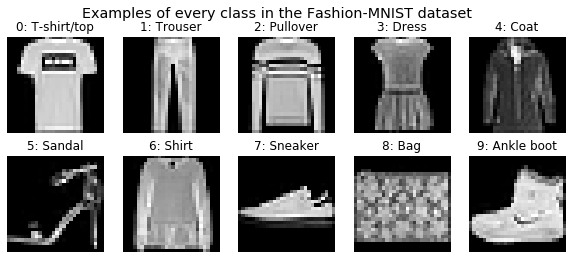

In [8]:
# 各クラスのラベルを持つサンプルを1つずつ取得する。
class_ids, sample_indices = np.unique(train_dataset.targets, return_index=True)

fig = plt.figure(figsize=(10, 4))
fig.suptitle(
    "Examples of every class in the Fashion-MNIST dataset", fontsize="x-large"
)

for i in class_ids:
    img = train_dataset.data[sample_indices[i]]
    class_name = train_dataset.classes[i]

    ax = fig.add_subplot(2, 5, i + 1)
    ax.set_title(f"{i}: {class_name}")
    ax.set_axis_off()
    ax.imshow(img, cmap="gray")

plt.show()